In [12]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from scipy import stats
import io
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540

https://machinelearninginterview.com/topics/machine-learning/how-to-find-the-optimal-number-of-clusters-in-k-means-elbow-and-silhouette-methods/

In [4]:
X, Y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=100)

In [5]:
X.shape, Y.shape

((1000, 12), (1000,))

In [6]:
model = KMeans(random_state=100)
model

KMeans(random_state=100)

In [45]:
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(4,12))
#visualizer = KElbowVisualizer(model, k=(4,12),locate_elbow=False)

In the above line of code, we are defining a range for the number of K to pass to the model in a range of 2-11 and select K where an elbow is formed which basically means that where ever the value of K and sum of squared errors is less, that K is selected. This elbow method works well only when the data is very clustered.

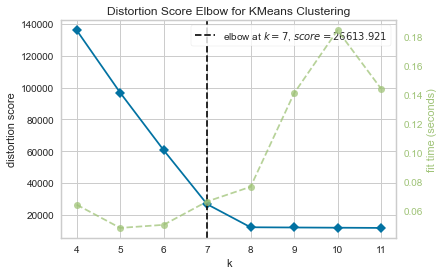

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

By default, the scoring parameter metric is set to distortion, which computes the sum of squared distances from each point to its assigned center. However, two other metrics can also be used with the KElbowVisualizer – silhouette and calinski_harabasz. The silhouette score calculates the mean Silhouette Coefficient of all samples, while the calinski_harabasz score computes the ratio of dispersion between and within clusters.

In [47]:
visualizer1 = KElbowVisualizer(model, k=(4,12), metric='calinski_harabasz', timings=False)

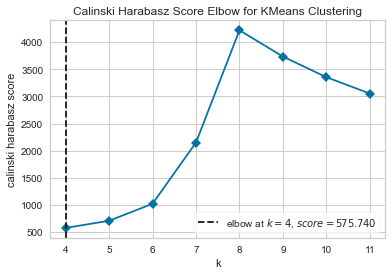

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [48]:
visualizer1.fit(X)        # Fit the data to the visualizer
visualizer1.show()        # Finalize and render the figure

In [49]:
visualizer2 = KElbowVisualizer(model, k=(4,12), metric='calinski_harabasz', timings=False, locate_elbow=False)

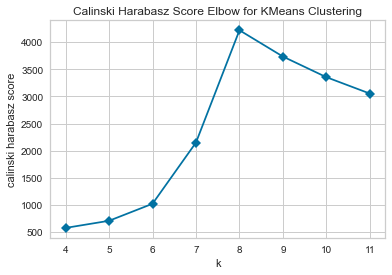

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [50]:
visualizer2.fit(X)        # Fit the data to the visualizer
visualizer2.show()        # Finalize and render the figure

It is important to remember that the “elbow” method does not work well if the data is not very clustered. In this case, you might see a smooth curve and the optimal value of K will be unclear.
K = 7,8

In [51]:
X1, Y1 = load_nfl()

In [52]:
X1

,Age,G,GS,Tgt,Rec,Ctch_Rate,Yds,Y/R,TD,Lng,...,Fmb,C_pos,CB_pos,DT_pos,FB_pos,QB_pos,RB_pos,T_pos,TE_pos,WR_pos
0,25,16,16,147,125,0.850,1405,11.2,9,72,...,2,0,0,0,0,0,0,0,0,1
1,28,16,16,156,116,0.744,1163,10.0,8,34,...,1,0,0,0,0,0,0,0,1,0
2,26,16,16,163,115,0.706,1572,13.7,11,49,...,2,0,0,0,0,0,0,0,0,1
3,29,16,16,170,113,0.665,1677,14.8,8,58,...,2,0,0,0,0,0,0,0,0,1
4,28,16,16,153,113,0.739,1373,12.2,9,68,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,24,3,0,1,1,1.000,14,14.0,0,14,...,1,0,0,0,0,0,0,0,0,0
490,24,3,0,1,1,1.000,1,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
491,35,16,16,1,1,1.000,9,9.0,0,9,...,0,0,0,1,0,0,0,0,0,0
492,30,16,16,1,1,1.000,-11,-11.0,0,-11,...,10,0,0,0,0,1,0,0,0,0


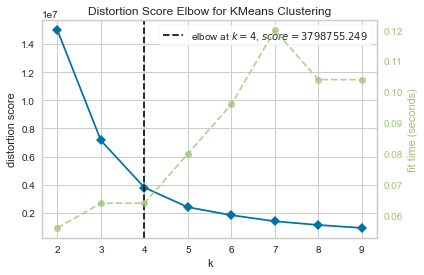

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

In [53]:
kelbow_visualizer(model, X1, k=(2,10))

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer

model = KMeans(random_state=100)
model

visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', timings=True, locate_elbow=True)
visualizer = KElbowVisualizer(model, k=(1,12),locate_elbow=True)

visualizer.fit(dataset)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

kelbow_visualizer(model, dataset, k=(2,10))

--------------------------------------------------------------
kmeans = KMeans(n_clusters=10, random_state=100)

kmeans.fit(train)

pred = kmeans.predict(test)

clusters = kmeans.fit_predict(dataset/train)
kmeans.cluster_centers_.shape 
kmeans.cluster_centers_

clusters


# geeks

In [4]:
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

In [6]:
X.shape

(17, 2)

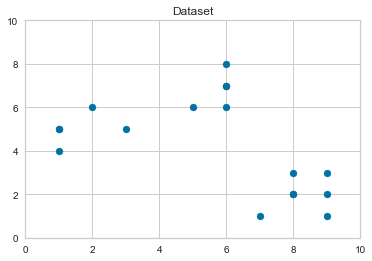

In [7]:
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

In [8]:
# from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=100)
model

KMeans(random_state=100)

In [9]:
visualizer = KElbowVisualizer(model, k=(1,12),locate_elbow=True)

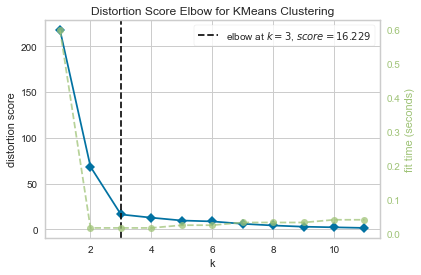

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
visualizer.fit(X)
visualizer.show()

In [11]:
kmeans = KMeans(n_clusters=3, random_state=100)

In [12]:
clusters = kmeans.fit_predict(X)

In [14]:
kmeans.cluster_centers_.shape 

(3, 2)

In [22]:
centroids=kmeans.cluster_centers_

In [28]:
centroids

array([[5.8       , 6.8       ],
       [8.28571429, 2.        ],
       [1.6       , 5.        ]])

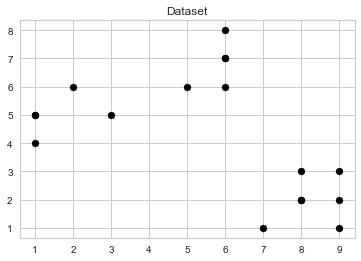

In [24]:
plt.plot()
plt.title('Dataset')
plt.scatter(x1, x2,c='black')
plt.show()

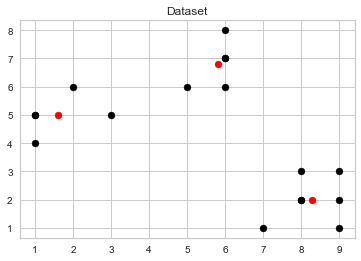

In [31]:
plt.plot()
plt.title('Dataset')
plt.scatter(x1, x2,c='black')
plt.scatter(centroids[:,0],centroids[:,1],c='red')
plt.show()

In [34]:
clusters

array([2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [35]:
X

array([[3, 5],
       [1, 4],
       [1, 5],
       [2, 6],
       [1, 5],
       [6, 8],
       [6, 6],
       [6, 7],
       [5, 6],
       [6, 7],
       [7, 1],
       [8, 2],
       [9, 1],
       [8, 2],
       [9, 3],
       [9, 2],
       [8, 3]])

In [43]:
frame = pd.DataFrame(X)
frame['cluster'] = clusters
frame

,0,1,cluster
0,3,5,2
1,1,4,2
2,1,5,2
3,2,6,2
4,1,5,2
5,6,8,0
6,6,6,0
7,6,7,0
8,5,6,0
9,6,7,0


In [51]:
k=3

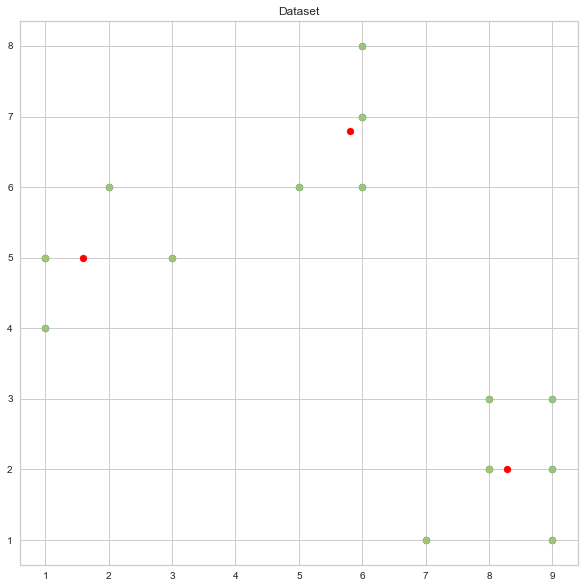

In [57]:
#color=['blue','green','cyan']
plt.figure(figsize=(10,10))
for k in range(k):
    data = frame[frame["cluster"]==k]
    plt.scatter(x1, x2)
plt.scatter(centroids[:,0],centroids[:,1],c='red')
plt.title('Dataset')
plt.show()

# Elbow Method in Supervised Machine Learning(Optimal K Value)

error_rate = []
#Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,40,1),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

The optimal value of K is __. The graph of the error rate is minimum at __. Retrain with new K Value.